![image](https://1.bp.blogspot.com/-w22Iw7BRZsg/XzWx-S7DtpI/AAAAAAAAGZg/zgpN2e5Oye8qPXfq0zLq6dm38afXaUa8gCLcBGAsYHQ/s1999/image4%2B%25281%2529.jpg)

BlazePose is a novel convolutional neural network architecture for human pose estimation that can run in real-time on mobile devices. It can detect 33 body keypoints, including face, hands, and feet, which are useful for applications like fitness, dance, and gesture control. BlazePose is based on a two-step detector-tracker pipeline that first locates the pose region-of-interest and then predicts the keypoints from it. BlazePose outperforms existing pose models in terms of accuracy, speed, and memory. BlazePose can also provide clinically viable body keypoints for virtual motion assessment.


[
https://arxiv.org/abs/2006.10204
](https://)



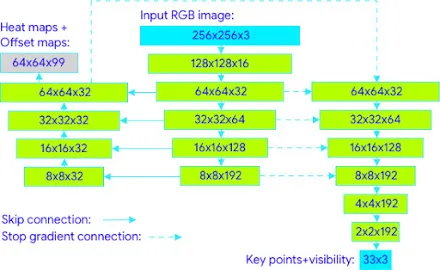

#Installations and dependensies

In [1]:
#@title Mediapipe instalation
!pip install mediapipe

## Download tools from github:

In [2]:
user = "ItayCoifman"
repo = "blazepose-mediapipe-example"
src_dir = "tools"
pyfile = "video.py"
url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url};
pyfile = "visualize.py"
url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url};
pyfile = "utils.py"
url = f"https://raw.githubusercontent.com/{user}/{repo}/main/{src_dir}/{pyfile}"
!wget --no-cache --backups=1 {url};

--2025-12-04 06:51:02--  https://raw.githubusercontent.com/ItayCoifman/blazepose-mediapipe-example/main/tools/video.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7213 (7.0K) [text/plain]
Failed to rename video.py to video.py.1: (2) No such file or directory
Saving to: ‘video.py’

video.py            100%[===================>]   7.04K  --.-KB/s    in 0s      

2025-12-04 06:51:02 (83.0 MB/s) - ‘video.py’ saved [7213/7213]

--2025-12-04 06:51:02--  https://raw.githubusercontent.com/ItayCoifman/blazepose-mediapipe-example/main/tools/visualize.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... 

## Imports

In [3]:
# from tools import video,utils,visualize

In [4]:
from video import Video
import visualize
from utils import landmarks_2_table
import mediapipe as mp
import os
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from IPython.display import clear_output, display



/usr/local/lib/python3.12/dist-packages/jaxlib/plugin_support.py:71: RuntimeWarning: JAX plugin jax_cuda12_plugin version 0.7.2 is installed, but it is not compatible with the installed jaxlib version 0.7.1, so it will not be used.
  warnings.warn(


## Functions

In [5]:
def video_pose_estimation(video_path: str, output_path = None, verbose=True):
    """
    Apply a pose estimation model to each frame of a video and return a processed video and the output from the model for each frame.

    Args:
    video_path (str): File path of the video to be processed.
    output_path (str, optional): File path of the output video. Default is None.
    verbose (bool, optional): Boolean indicating whether to print progress updates. Default is True.

    Returns:
    vid (Video): Processed video object.
    marker_df (DataFrame): DataFrame containing the x, y, and z coordinates of each landmark for each frame of the processed video.
    visibility_df (DataFrame): DataFrame containing the visibility score for each landmark for each frame of the processed video.
    """
    output = []
    timestamps =[]
    # Todo add option to input video:
    vid = Video.from_path(video_path)
    video_name = os.path.basename(video_path)
    #init video writer and reader
    vid_cap = cv2.VideoCapture(vid.path)
    video_writer = cv2.VideoWriter(output_path, cv2.VideoWriter_fourcc(*"mp4v"), vid.fps, (vid.width, vid.height))
    if verbose:
        print(f"Processing- {vid} \n")

    # Initialize the pose estimation model
    with mp.solutions.pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
        for frame_index in tqdm(range(vid.nFrames)):
            success, img = vid_cap.read()
            if not success:
                break
            # Convert BGR to RGB
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            # Get the timestamp of the current frame
            timestamps.append(vid_cap.get(cv2.CAP_PROP_POS_MSEC))
            # Run the model
            results = pose.process(img)
            output.append(results)
            # Draw the pose annotation on the image.
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            mp.solutions.drawing_utils.draw_landmarks(
                img,
                results.pose_landmarks,
                mp.solutions.pose.POSE_CONNECTIONS,
                landmark_drawing_spec=mp.solutions.drawing_styles.get_default_pose_landmarks_style()
                )
                    # Write the frame to the output video
            video_writer.write(img)
    # close video
    video_writer.release()
    cv2.destroyAllWindows()
    # Return the processed video and the model outputs
    try:
      marker_df,visibility_df = landmarks_2_table(output,time_vec = np.array(timestamps)/1000)
    except:
      marker_df,visibility_df = output,[]
      print("plese replace the video")
    return Video.from_path(output_path), marker_df, visibility_df



# BlazePose Mediapipe - Extract Pose Estimation From Video:

## Upload your video

In [6]:
from google.colab import files
uploaded = files.upload()
for file_name in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=file_name, length=len(uploaded[file_name])))

Saving video3.mp4 to video3.mp4
User uploaded file "video3.mp4" with length 1694546 bytes


## Estimate pose

In [7]:
output_path = "proc.mp4"
vid, marker_df,visibility_df  = video_pose_estimation(video_path = file_name,output_path =output_path)

Processing- Name- video3.mp4:
 Width- 1446, Height- 882 
 number of frames- 291, Fps- 24.78013426120854 
 Path-video3.mp4 



100%|██████████| 291/291 [00:13<00:00, 21.60it/s]


## Veiw your results
Notice- Convert funciton is only used for presenting Video in google Colab

In [8]:
vid.convert()
vid.play(frac = 0.75) #change frac acording to the video width and height

Converted to colab freiendly format


In [9]:
marker_df.head()

t    nose_x    nose_y    nose_z  left_eye_inner_x  left_eye_inner_y  \
0  0.000000 -0.230232  1.276022  0.001861         -0.209391          1.311275   
1  0.063278 -0.253032  1.276019  0.000838         -0.226401          1.311275   
2  0.103278 -0.254947  1.275283  0.000895         -0.227498          1.310285   
3  0.143278 -0.253516  1.276172  0.001089         -0.223604          1.310919   
4  0.183278 -0.253121  1.275309  0.006718         -0.222998          1.310197   

   left_eye_inner_z  left_eye_x  left_eye_y  left_eye_z  ...  left_heel_z  \
0          0.005163   -0.207142    1.314216    0.005008  ...     0.086901   
1          0.002363   -0.224183    1.314265    0.002796  ...     0.088166   
2          0.002336   -0.225121    1.313597    0.002813  ...     0.088440   
3          0.002274   -0.220938    1.314434    0.002829  ...     0.087686   
4          0.006805   -0.220311    1.313729    0.007974  ...     0.089249   

   right_heel_x  right_heel_y  right_heel_z  left_foot_index_x  \
0     -0.259959      0.256108     -0.103704          -0.050165   
1     -0.235444      0.302082     -0.111235          -0.028716   
2     -0.236586      0.305535     -0.114997          -0.049401   
3     -0.268508      0.257519     -0.115386          -0.094846   
4     -0.280663      0.258042     -0.107258          -0.113241   

   left_foot_index_y  left_foot_index_z  right_foot_index_x  \
0           0.101118           0.135916           -0.549942   
1           0.125046           0.143199           -0.538147   
2           0.122785           0.148317           -0.543433   
3           0.026477           0.147762           -0.550788   
4           0.036166           0.149156           -0.564451   

   right_foot_index_y  right_foot_index_z  
0            0.349804           -0.030419  
1            0.404558           -0.028261  
2            0.408605           -0.025287  
3            0.333686           -0.024926  
4            0.338672           -0.024404  

[5 rows x 100 columns]

In [10]:
visibility_df.head()

t      nose  left_eye_inner  left_eye  left_eye_outer  \
0  0.000000  0.999999        0.999997  0.999998        0.999996   
1  0.063278  0.999999        0.999997  0.999998        0.999996   
2  0.103278  0.999999        0.999997  0.999998        0.999996   
3  0.143278  0.999999        0.999996  0.999998        0.999995   
4  0.183278  0.999999        0.999996  0.999998        0.999995   

   right_eye_inner  right_eye  right_eye_outer  left_ear  right_ear  ...  \
0         0.999997   0.999997         0.999996  0.999997   0.999998  ...   
1         0.999997   0.999997         0.999996  0.999997   0.999998  ...   
2         0.999996   0.999997         0.999995  0.999997   0.999998  ...   
3         0.999996   0.999997         0.999995  0.999997   0.999997  ...   
4         0.999995   0.999997         0.999994  0.999997   0.999997  ...   

   left_hip  right_hip  left_knee  right_knee  left_ankle  right_ankle  \
0  0.431474   0.465175   0.001463    0.001481    0.000113     0.000035   
1  0.420796   0.450526   0.001340    0.001349    0.000102     0.000032   
2  0.398119   0.424321   0.001231    0.001235    0.000094     0.000029   
3  0.379948   0.405097   0.001170    0.001181    0.000090     0.000030   
4  0.358691   0.380861   0.001114    0.001127    0.000091     0.000032   

   left_heel  right_heel  left_foot_index  right_foot_index  
0   0.000153    0.000116         0.000071          0.000148  
1   0.000140    0.000105         0.000065          0.000136  
2   0.000129    0.000097         0.000060          0.000125  
3   0.000130    0.000098         0.000061          0.000124  
4   0.000135    0.000106         0.000065          0.000136  

[5 rows x 34 columns]

## Export and download Results:

In [11]:
download_markers = True #@param ["False", "True"] {type:"raw"}
if download_markers:
  markers_file = 'markers.csv'
  marker_df.to_csv(markers_file)
  #files.download(markers_file)

In [12]:
download_visability = True #@param ["False", "True"] {type:"raw"}
if download_visability:
  visibility_file = 'visibility.csv'
  visibility_df.to_csv(visibility_file)
  #files.download(visibility_file)

In [13]:
download_video = False #@param ["False", "True"] {type:"raw"}
if download_video:
  files.download(vid.path)

# Our work

# Transform CSV array
We now have markers_df containing data from all the points at each time frame. We first transform it to a csv file, containing (N_frame+1) raws and 101 columns : 1 columns for time, 1 is Unnamed (comes from CSV transformation) and the 99 others (33*3) are each coordinate of each keypoints. We now want to transform this (N+1)x101 array to a (N+1)x(33x3) array.

In [14]:
df = pd.read_csv("/content/markers.csv")
print("CSV shape:", df.shape)
#print("Columns:", df.columns)

CSV shape: (291, 101)


In [15]:
def load_sequence_from_csv(csv_path: str) -> np.ndarray:
    df = pd.read_csv(csv_path)

    # garder uniquement X,Y,Z pour les 33 landmarks
    coords_cols = [c for c in df.columns
                   if c.endswith("_x") or c.endswith("_y") or c.endswith("_z")]

    if len(coords_cols) != 99:
        raise ValueError(f"Expected 99 coordinate columns (33*3), got {len(coords_cols)}.")

    df_xyz = df[coords_cols]
    arr = df_xyz.values.astype(np.float32)   # shape (T, 99)
    T = arr.shape[0]

    seq_xyz = arr.reshape(T, 33, 3)
    return seq_xyz


seq_xyz = load_sequence_from_csv("/content/markers.csv")
print(seq_xyz.shape)  # (T, 33, 3)
#print(seq_xyz)

(291, 33, 3)


seq_xyz : Array containing all keypoints positions (x,y,z) at each frame

# What about keypoints that are not on the video ?

Mediapipe guesses their positions. We want to avoid this to train our model (might lead to weird results), so we will use the visibility csv file, to remove the training on the points having a visibility (<0,5).


In [16]:
df_vis = pd.read_csv("/content/visibility.csv") #first, read the csv file

In [17]:
print(df_vis.shape)  # (T, 35), we don't have to reshape it

(291, 35)


In [18]:
# This cell will remove time and Unnamed column.

landmark_cols = df_vis.columns[2:]   # garde seulement les 33 points
assert len(landmark_cols) == 33, f"Attendu 33 colonnes de points, trouvé {len(landmark_cols)}"

# Convertir en numpy (T, 33)
seq_vis = df_vis[landmark_cols].values.astype(np.float32)
T_vis, J_vis = seq_vis.shape
print("New shape : seq_vis shape:", seq_vis.shape)  # (T, 33)

New shape : seq_vis shape: (291, 33)


In [19]:
def apply_visibility_mask(seq_xyz: np.ndarray,
                          seq_vis: np.ndarray,
                          threshold: float = 0.5) -> np.ndarray:
    """
    seq_xyz : (T, 33, 3)
    seq_vis : (T, 33)
    Remplace les joints avec visibility < threshold par NaN.
    """
    assert seq_xyz.shape[0] == seq_vis.shape[0]
    assert seq_xyz.shape[1] == seq_vis.shape[1]

    seq = seq_xyz.copy()
    T, J, C = seq.shape

    # masque booléen (T, J)
    mask = seq_vis < threshold

    # On étend le masque sur la dimension des coordonnées (x,y,z)
    mask_3d = np.repeat(mask[:, :, None], C, axis=2)  # (T, J, 3)

    seq[mask_3d] = np.nan
    return seq

seq_clean = apply_visibility_mask(seq_xyz, seq_vis, threshold=0.5)
print("seq_clean shape:", seq_clean.shape)  # (T, 33, 3)
#print(seq_clean)


seq_clean shape: (291, 33, 3)


seq_clean : Modified version of seq_xyz array, having Nan value for a point that is not detected on the video (visibility <0.1).

# Normalized gesture representation

Normalization is essential to make human gestures comparable and learnable. By centering the skeleton on the shoulders (usually it would be on the hips, but we might have troubles later if the hips are not in the frame of the video), scaling by shoulder width, and resampling all sequences to a fixed length, we remove variations caused by camera position, body size, and gesture duration. This produces a canonical, consistent representation of the motion, which is crucial for learning stable and generalizable motor primitives (DMPs).

#Normalisation + bonne extraction + tourner stickman pour bon affichage

In [20]:
def normalize_skeleton_sequence(seq: np.ndarray, target_len: int = 50) -> np.ndarray:
    """
    seq: (T, 33, 3)  -> (target_len, 33, 2)
    Utilise les composantes 1 et 2 (y, z) au lieu de (x, y).

    Étapes :
    - recentrage sur les épaules
    - normalisation d'échelle
    - rééchantillonnage temporel
    """

    T, J, C = seq.shape
    assert C == 3, "Seq must be (T, 33, 3)"

    # --- 1) On garde les axes (1,2) uniquement ---
    # (y, z) deviennent nos coordonnées 2D
    seq_yz = seq[:, :, 1:3]     # shape : (T, 33, 2)

    # 1 bis) Center on shoulders (avec les nouvelles coordonnées)
    shoulder_left_idx, shoulder_right_idx = 11, 12
    center = (seq_yz[:, shoulder_left_idx, :] + seq_yz[:, shoulder_right_idx, :]) / 2.0
    seq_centered = seq_yz - center[:, None, :]  # (T, 33, 2)

    # --- 2) Scale normalization using shoulder width ---
    shoulder_dist = np.linalg.norm(
        seq_centered[:, shoulder_left_idx, :] - seq_centered[:, shoulder_right_idx, :],
        axis=1
    )
    valid = shoulder_dist > 1e-3
    scale = np.mean(shoulder_dist[valid]) if np.any(valid) else 1.0
    seq_scaled = seq_centered / scale

    # --- 3) Temporal resampling ---
    t_old = np.linspace(0, 1, T)
    t_new = np.linspace(0, 1, target_len)

    seq_resampled = np.zeros((target_len, J, 2), dtype=np.float32)

    for j in range(J):
        for c in range(2):
            f = interp1d(
                t_old,
                seq_scaled[:, j, c],
                kind="linear",
                fill_value="extrapolate"
            )
            seq_resampled[:, j, c] = f(t_new)

    return seq_resampled



In [21]:

EDGES = [
    # Visage / tête
    (1, 2), (2, 3),
    (4, 5), (5, 6),
    (1, 0), (0, 4),
    (7, 3), (8, 6),
    (9, 0), (10, 0),
    (9, 10),

    # Tronc
    (11, 12),
    (11, 23), (12, 24),
    (23, 24),

    # Jambes droites
    (23, 25), (25, 27),
    (27, 29), (29, 31),

    # Jambes gauches
    (24, 26), (26, 28),
    (28, 30), (30, 32),

    # Bras droit
    (11, 13), (13, 15),
    (15, 17), (17, 19),
    (17, 21), (19, 21),

    # Bras gauche
    (12, 14), (14, 16),
    (16, 18), (18, 20),
    (18, 22), (20, 22),
]

def plot_stickman_frame2(ax, norm_seq, frame_idx: int):
    pts = norm_seq[frame_idx]          # (33, 2)
    visible = ~np.isnan(pts).any(axis=1)

    ax.cla()   # efface le contenu des axes

    # segments
    for i, j in EDGES:
        if i < pts.shape[0] and j < pts.shape[0]:
            if visible[i] and visible[j]:
                x_vals = [pts[i, 0], pts[j, 0]]
                y_vals = [pts[i, 1], pts[j, 1]]
                ax.plot(x_vals, y_vals, "-")

    # points visibles
    x_vis = pts[visible, 0]
    y_vis = pts[visible, 1]
    ax.scatter(x_vis, y_vis, c="red")

    # indices
    for idx in np.where(visible)[0]:
        x, y = pts[idx]
        ax.text(x, y, str(idx), fontsize=7)

    ax.set_title(f"Stickman (frame {frame_idx})")
    ax.axis("equal")
    ax.grid(True)

In [32]:
# D'abord, on applique la normalisation

norm_seq = normalize_skeleton_sequence(seq_clean, target_len=50)

In [43]:
def rotate_skeleton_xy(seq: np.ndarray) -> np.ndarray:
    """
    Prend un tableau (T, J, 2) et échange les colonnes x et y.
    Retourne un nouveau tableau (ne modifie pas l'original).
    """
    rotated = seq.copy()
    pts = rotated.copy()
    rotated[:, :, 0] = pts[:, :, 1]  # nouveau x = ancien y
    rotated[:, :, 1] = pts[:, :, 0]  # nouveau y = ancien x
    return rotated



In [45]:
norm_seq_rot = rotate_skeleton_xy(norm_seq)
#Ensuite on plot le stickman normalisé sur 50 frames

def plot_stickman(seq):
  fig, ax = plt.subplots(figsize=(6, 6))
  for i in range(0, min(T,50)):
      plot_stickman_frame2(ax, norm_seq_rot, frame_idx=i)
      clear_output(wait=True)  # efface la sortie de la cellule
      display(fig)             # ré-affiche la figure
      plt.pause(0.05)          # petit délai pour voir l'update

  plt.close(fig)

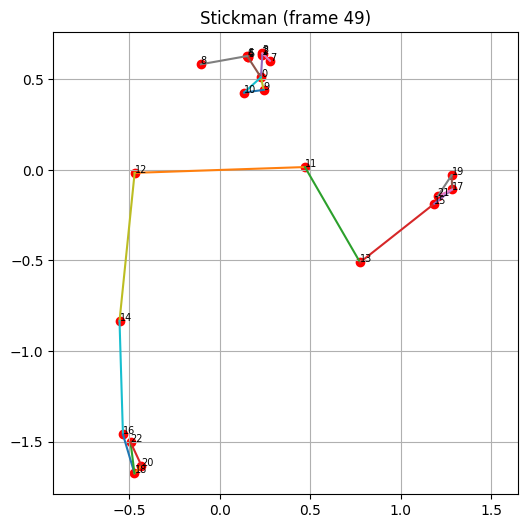

In [47]:
plot_stickman(norm_seq_rot)

In [46]:
print (norm_seq.shape)


(50, 33, 2)


# Select our pertinent keypoints
Both eyes, mouth, shoulder, elbows and hands.

In [23]:
KEYPOINTS = [2, 5, 9, 10, 11, 12] + list(range(13, 23))

seq_selected = norm_seq[:, KEYPOINTS, :]   # shape (50, 16, 2)

print(seq_selected.shape)


(50, 16, 2)


In [24]:
#changes seq_selected size from (16,2) to 32

def seq_to_vector_trajectory(seq_sel: np.ndarray) -> np.ndarray:
    """
    seq_sel : (T, J_sel, 2)
    retourne : (T, 2 * J_sel)
    """
    T, J, C = seq_sel.shape
    assert C == 2
    traj_vec = seq_sel.reshape(T, J * C)
    return traj_vec

traj_vec = seq_to_vector_trajectory(seq_selected)
print(traj_vec.shape)  # (T, 32)


(50, 32)


In [25]:
class DMPVector:
    def __init__(self, n_basis: int = 20):
        self.n_basis = n_basis #number of gaussians
        self.centers = None
        self.widths = None
        self.W = None       # (n_basis, D)
        self.y0 = None      # (D,)
        self.g = None       # (D,)
        self.T_train = None

    #define each psi function
    def _basis_functions(self, T: int):
        t = np.linspace(0.0, 1.0, T)
        self.centers = np.linspace(0.0, 1.0, self.n_basis)
        self.widths = np.ones(self.n_basis) * (self.n_basis ** 2)
        psi = np.exp(-self.widths * (t[:, None] - self.centers[None, :])**2)
        return psi, t

    def fit(self, Y: np.ndarray):
        """
        Y : (T, D) trajectoire vectorielle (ici D=32)
        """
        T, D = Y.shape
        self.T_train = T
        self.y0 = Y[0].copy()
        self.g  = Y[-1].copy()     #goal point for each trajectory

        psi, t = self._basis_functions(T)   # psi: (T, n_basis)

        # Composante linéaire entre y0 et g pour chaque dimension
        Y_lin = self.y0 + np.outer(t, (self.g - self.y0))   # (T, D)

        # Composante non linéaire à approximer
        F_target = Y - Y_lin                                # (T, D)

        # Normalisation des bases
        psi_sum  = np.sum(psi, axis=1, keepdims=True) + 1e-10
        psi_norm = psi / psi_sum                           # (T, n_basis)

        # Résolution des poids W dans F_target ≈ psi_norm @ W
        # psi_norm: (T, n_basis), F_target: (T, D) -> W: (n_basis, D)
        self.W, _, _, _ = np.linalg.lstsq(psi_norm, F_target, rcond=None)

    def rollout(self, T: int = None, amplitude_scale: float = 1.0) -> np.ndarray:
        """
        Génère une nouvelle trajectoire :
        - T : nombre de pas (si None -> même T que l'entraînement)
        - amplitude_scale : scaling global de la partie non-linéaire
        Retour : (T, D)
        """
        if T is None:
            T = self.T_train

        psi, t = self._basis_functions(T)
        psi_sum  = np.sum(psi, axis=1, keepdims=True) + 1e-10
        psi_norm = psi / psi_sum

        # F: (T, D)
        F = psi_norm @ self.W * amplitude_scale

        # partie linéaire entre y0 et g
        Y_lin = self.y0 + np.outer(t, (self.g - self.y0))

        Y = Y_lin + F
        return Y


In [26]:
dmp_vec = DMPVector(n_basis=20)
dmp_vec.fit(traj_vec) # fit une trajectoire vectorielle -c'est l'extraction puis normalisation des points de la video du dataset

gen_traj_vec = dmp_vec.rollout(T=T, amplitude_scale=1.0)  # (T, 32)
print(gen_traj_vec.shape)


(50, 32)


In [27]:
def vector_to_seq(gen_vec: np.ndarray, n_keypoints: int) -> np.ndarray:
    """
    gen_vec : (T, 2 * n_keypoints)
    retourne : (T, n_keypoints, 2)
    """
    T, D = gen_vec.shape
    assert D == 2 * n_keypoints
    seq = gen_vec.reshape(T, n_keypoints, 2)
    return seq

gen_selected = vector_to_seq(gen_traj_vec, n_keypoints=len(KEYPOINTS))  # (T, 16, 2)

def rebuild_full_skeleton(gen_selected: np.ndarray,
                          template_seq: np.ndarray,
                          keypoints=KEYPOINTS) -> np.ndarray:
    """
    gen_selected : (T, len(KEYPOINTS), 2)
    template_seq : (T, 33, 2) pour connaître shape et éventuellement garder NaN ailleurs
    """
    T, J_all, C = template_seq.shape
    full = np.full_like(template_seq, np.nan)  # tout à NaN
    full[:, keypoints, :] = gen_selected
    return full

gen_full = rebuild_full_skeleton(gen_selected, norm_seq, KEYPOINTS)  # (T, 33, 2)
print(gen_full.shape)

(50, 33, 2)


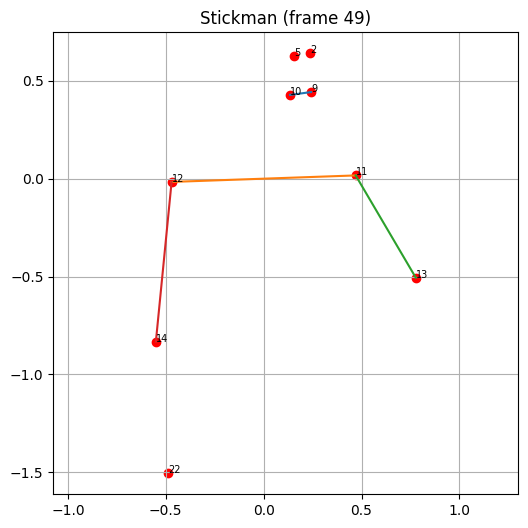

In [28]:
fig, ax = plt.subplots(figsize=(6, 6))
T = norm_seq.shape[0]
for i in range(0, min(T,50)):
    plot_stickman_frame2(ax, gen_full, frame_idx=i)
    clear_output(wait=True)  # efface la sortie de la cellule
    display(fig)             # ré-affiche la figure
    plt.pause(0.1)          # petit délai pour voir l'update

plt.close(fig)